# Portfolio Optimisation Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# The yfinance module is used to get the data from yahoo finance 
startdate='2017-01-01'
enddate='2020-12-31'
df_msft=yf.download('MSFT',start=startdate,end=enddate)
df_apple=yf.download('AAPL',start=startdate,end=enddate)
df_orcl=yf.download('ORCL',start=startdate,end=enddate)
df_amd=yf.download('AMD',start=startdate,end=enddate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df_msft.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.84,62.130001,62.580002,58.291965,20694100
2017-01-04,62.480000,62.75,62.119999,62.299999,58.031158,21340000


With the yfinance imported as yf, the yf.download('company_name',startdat,enddate), we get the data from the yahoo finance as a dataframe directly into the python. 


### Creating  a Portfolio of selected stocks

In [4]:
# First, we want to normalise the stock prices. In this case, we want to convert the dollar value into daily returns
# The Goal is to make changes observabe easier


In [5]:
df_orcl.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,38.450001,38.689999,38.299999,38.549999,35.671886,11051300
2017-01-04,38.549999,38.919998,38.549999,38.740002,35.847702,9545500


In [6]:
portfolio=[df_msft,df_orcl,df_apple,df_amd]
for stock in portfolio:
    stock['Normalising return']=stock['Adj Close']/stock.iloc[0]['Adj Close']

In [7]:
# We have created a new colum Normalising return where in we have included the returns 
df_apple.head(2)

,Open,High,Low,Close,Adj Close,Volume,Normalising return
Date,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.372364,115127600,1.000000
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.341724,84472400,0.998881


In [8]:
# First, we assign the weights to the stocks in the portflio
weights=[0.25,0.25,0.25,0.25]
portfolio_with_weight=zip(portfolio,weights)
for stock,weight in portfolio_with_weight:
    stock['Allocation']=stock['Normalising return']*weight

In [9]:
# now, we have allocated equal amount of money in all the stocks in the portfolio
df_apple.head(2)

,Open,High,Low,Close,Adj Close,Volume,Normalising return,Allocation
Date,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.372364,115127600,1.000000,0.25000
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.341724,84472400,0.998881,0.24972


In [10]:
# now, let's invest 20,000 $ in the portfolio
for stock in portfolio:
    stock['Initial_position']=stock['Allocation']*20000

In [11]:
df_apple.head(1)


,Open,High,Low,Close,Adj Close,Volume,Normalising return,Allocation,Initial_position
Date,,,,,,,,,
2017-01-03,28.950001,29.0825,28.690001,29.0375,27.372364,115127600,1.0,0.25,5000.0


In [12]:
# Now let's create a dataframe for the initial position of all the stocks and visualise it

In [13]:
df_stocks_initial_position=pd.DataFrame({'Apple':df_apple['Initial_position'],'Microsoft':df_msft['Initial_position'],
                                         'Oracle':df_orcl['Initial_position'],'AMD':df_amd['Initial_position']
                                        })

In [14]:
df_stocks_initial_position['Total']=df_stocks_initial_position.sum(axis=1)

In [15]:
df_stocks_initial_position.head(2)

,Apple,Microsoft,Oracle,AMD,Total
Date,,,,,
2017-01-03,5000.000000,5000.000000,5000.000000,5000.0,20000.000000
2017-01-04,4994.403178,4977.629247,5024.643438,5000.0,19996.675863


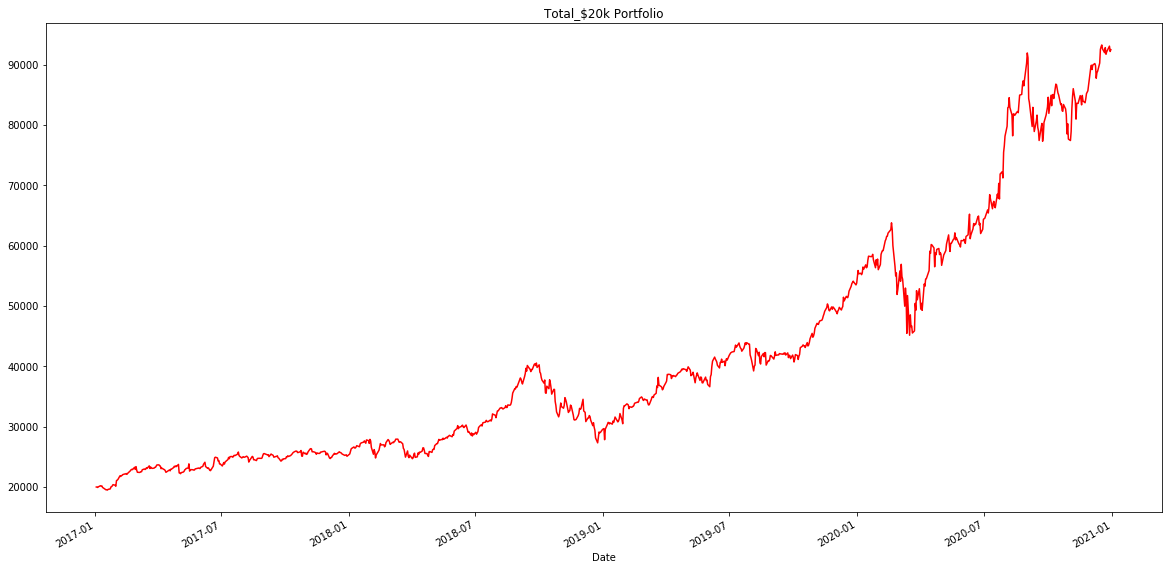

In [34]:
df_stocks_initial_position['Total'].plot(kind='line',figsize=(20,10),title='Total_$20k Portfolio',color='red')

In [17]:
name=['Apple','Microsoft','Oracle','AMD','Total']

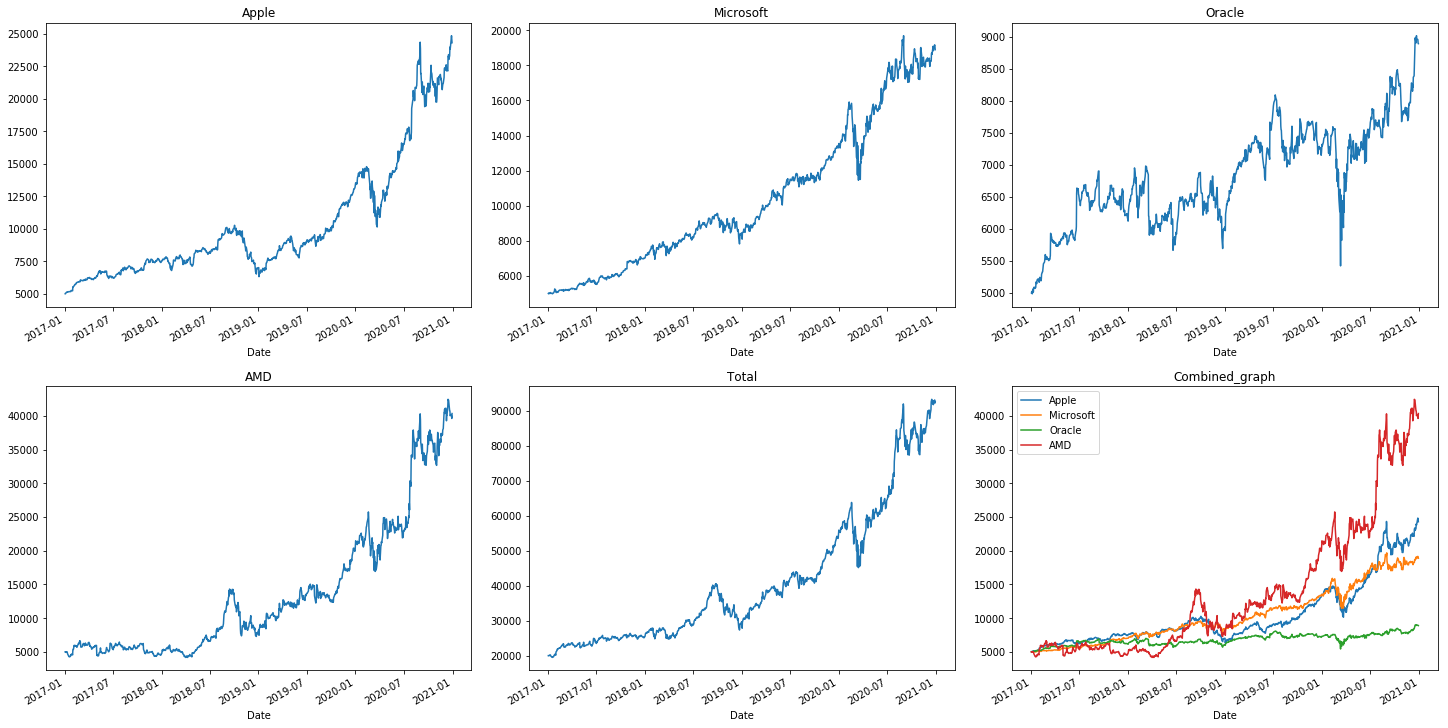

In [18]:
fig,ax1=plt.subplots(nrows=2,ncols=3,figsize=(20,10),constrained_layout=True)
ax1=ax1.flatten()
for i,j in enumerate(name):
    df_stocks_initial_position[j].plot(kind='line',ax=ax1[i],title=j)

df_stocks_initial_position.drop('Total',axis=1).plot(kind='line',ax=ax1[5],title='Combined_graph')

In [37]:
# cumulative portfolio return in percentage terms
cumulative=((df_stocks_initial_position['Total'][-1]/df_stocks_initial_position['Total'][0])-1)
print('The cumulative return from the portfolio of the stocks over the given time period is {} %'.format(cumulative))

The cumulative return from the portfolio of the stocks over the given time period is 3.6232248727343483 %


### Daily Returns 

In [20]:
# calculating the Daily returns
df_stocks_initial_position.head(2)

,Apple,Microsoft,Oracle,AMD,Total
Date,,,,,
2017-01-03,5000.000000,5000.000000,5000.000000,5000.0,20000.000000
2017-01-04,4994.403178,4977.629247,5024.643438,5000.0,19996.675863


In [21]:
df_stocks_initial_position['Daily_Return_%_change']=(df_stocks_initial_position['Total'].pct_change())*100
df_stocks_initial_position.head()

,Apple,Microsoft,Oracle,AMD,Total,Daily_Return_%_change
Date,,,,,,
2017-01-03,5000.000000,5000.000000,5000.000000,5000.000000,20000.000000,NaN
2017-01-04,4994.403178,4977.629247,5024.643438,5000.000000,19996.675863,-0.016621
2017-01-05,5019.801056,4977.629247,5011.671800,4916.885158,19925.987261,-0.353502
2017-01-06,5075.763699,5020.773333,4987.030501,4951.880749,20035.448283,0.549338
2017-01-09,5122.254878,5004.793896,5062.256374,5026.246485,20215.551634,0.898923


In [38]:
# Sharpe Ratio: The return per unit amount of risk in addition to the risk free rate is termed as the sharpe ratio.
# Here, for ease of calculation purposes, we assume the risk free rate to be 0
sharpe_ratio=df_stocks_initial_position['Daily_Return_%_change'].mean()/df_stocks_initial_position['Daily_Return_%_change'].std()
sharpe_ratio

0.0869489367846341

### Annualised Sharpe ratio
Since we have the daily volatility, to convert it into annual volatility, we multiply the daily volatility with sqrt of 252

In [39]:
sharpe_ratio_annualised=sharpe_ratio*(np.sqrt(252))
sharpe_ratio_annualised

1.3802715809617072

Now, we will use the Sharpe ratio to connstruct a portfolio with Optimal performance. Based on Modern Portfolio  Thoery, 
We want to make Portfolios that give us the most amount of return with a least amount of risk. We try to reach the 
GLobal Minimum variance portfolio

## Set up for Portfolio Optimisation
We want to optimise our portfolio to reach the highest sharpe ratio

In [40]:
# concatenating the Adjusted close prices for all the stocks
df_new=pd.concat([df_msft['Adj Close'],df_apple['Adj Close'],df_orcl['Adj Close'],df_amd['Adj Close']],axis=1)
df_new.columns=['Microsoft','Apple','Oracle','AMD']
df_new.head()

,Microsoft,Apple,Oracle,AMD
Date,,,,
2017-01-03,58.291965,27.372364,35.671886,11.43
2017-01-04,58.031158,27.341724,35.847702,11.43
2017-01-05,58.031158,27.480764,35.755157,11.24
2017-01-06,58.534149,27.787130,35.579357,11.32
2017-01-09,58.347855,28.041645,36.116047,11.49


In [41]:
# This will show the daily returns of the stocks in the portfolio over the time period chosen
stocks_return=df_new.pct_change(1)
stocks_return.head()

,Microsoft,Apple,Oracle,AMD
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.004474,-0.001119,0.004929,0.000000
2017-01-05,0.000000,0.005085,-0.002582,-0.016623
2017-01-06,0.008668,0.011148,-0.004917,0.007117
2017-01-09,-0.003183,0.009159,0.015084,0.015018


### Preparing Variables for the Portfolio Optimisation Technique

In [26]:
# We will find 20,000 different portfolio weight combinations and we will select the portfolio with the maximum sharpe ratio
number_portfolio_combinations=20000
all_weights=np.zeros((number_portfolio_combinations,len(df_new.columns)))

In [27]:
all_weights.shape

(20000, 4)

In [28]:
# Prelocating space for Protfolio calculations
returns_array=np.zeros(number_portfolio_combinations)
volatility_array=np.zeros(number_portfolio_combinations)
sharpe_array=np.zeros(number_portfolio_combinations)

# Calculate Portfolio Combinations


In [29]:
stocks=df_stocks_initial_position[['Apple','Microsoft','Oracle','AMD','Total']]
stocks.head()

,Apple,Microsoft,Oracle,AMD,Total
Date,,,,,
2017-01-03,5000.000000,5000.000000,5000.000000,5000.000000,20000.000000
2017-01-04,4994.403178,4977.629247,5024.643438,5000.000000,19996.675863
2017-01-05,5019.801056,4977.629247,5011.671800,4916.885158,19925.987261
2017-01-06,5075.763699,5020.773333,4987.030501,4951.880749,20035.448283
2017-01-09,5122.254878,5004.793896,5062.256374,5026.246485,20215.551634


In [94]:
import random
random.seed(3)
# we want to do 20,000 portfolio combinations to get the the portfolio with the Maximum return per unit amount of risk
for i in range(number_portfolio_combinations):
    # Generate random weights
    numbers=np.array(np.random.random(4))
    
    # here,4 random numbers are generated in every iteration
    weights=numbers/np.sum(numbers)
    
    # 4 weights are generated with the above code. 
    # every row is assigned the weights which are the weights of the stocks in the portfolio. 
    all_weights[i,:]=weights
    
    # Expected Return 
    returns_array[i]=np.sum(stocks_return.mean()*252*weights)
    
    #Expected Volatility
    volatility_array[i]=np.sqrt(np.dot(weights.T,np.dot(stocks_return.cov()*252,weights)))
    
    #Sharpe Ratio
    sharpe_array[i]=returns_array[i]/volatility_array[i]

In [95]:
sharpe_array

array([1.36778882, 1.21472223, 1.42277805, ..., 1.361104  , 1.43499746,
       1.28844508])

In [96]:
print('All weights',all_weights)
print('First combinaiton',all_weights[0])

All weights [[0.07350126 0.23291167 0.26403763 0.42954944]
 [0.19573019 0.18859026 0.52930361 0.08637594]
 [0.26247179 0.19219816 0.1884837  0.35684635]
 ...
 [0.42582155 0.13056453 0.31035431 0.13325961]
 [0.40451889 0.12335634 0.0949991  0.37712566]
 [0.20093195 0.02418382 0.38173389 0.39315034]]
First combinaiton [0.07350126 0.23291167 0.26403763 0.42954944]


## Finding the highest sharpe ratio

In [97]:
sharpe_array.max()

1.5452020275627916

## Finding the index of the higest sharpe ratio portfolio 

In [101]:
sharpe_array_max_index=sharpe_array.argmax()
sharpe_array_max_index

5361

## Getting the portfolio weights for the highest shape ratio portfolio

In [105]:
print(all_weights[5361])
print(stocks.columns)

[0.23790736 0.55176976 0.0033548  0.20696808]
Index(['Apple', 'Microsoft', 'Oracle', 'AMD', 'Total'], dtype='object')


## Plot the Efficient Frontier  

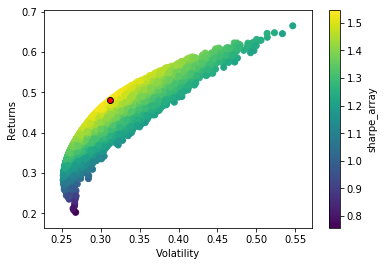

In [115]:
plt.scatter(volatility_array,returns_array,c=sharpe_array)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='sharpe_array')
# Plotting the portfolio with the highest sharpe ratio
plt.scatter(volatility_array[sharpe_array_max_index],returns_array[sharpe_array_max_index],color='red',edgecolors='black')

### We have found the optimal weights for the portfolio from 20,000 random weights. 
### We plotted the efficient frontier and found the minimum variance portfolio that maximises the sharpe Ratio(Return for the investor) 